## Correlation between GDP and HPI
### and Linear Regression

The purpose of this notebook is to look at the correlation/connection between Gross Domestic Product (GDP) and Happy Planet Index (HPI).

The model will be applied to the "wdi_hpi_2016" dataset, which was created in the Data Preprocessing JNotebook. This dataset is based on
* the Happy Planet Index for 2016 (see https://happyplanetindex.org/),
* the World Development Indicators (1960 - 2019) by the World Bank (see https://datacatalog.worldbank.org/dataset/world-development-indicators)

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
dataset = pd.read_pickle('../data/wdi_hpi_2016_df.pkl')
dataset = dataset[['Country Name','NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.PP.CD', 'Happy Planet Index']]

,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,Happy Planet Index
NY.GDP.MKTP.KD.ZG,1.000000,-0.064105,0.019509
NY.GDP.PCAP.PP.CD,-0.064105,1.000000,0.090915
Happy Planet Index,0.019509,0.090915,1.000000


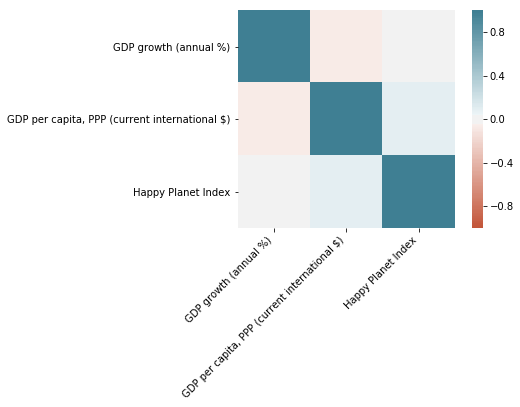

In [3]:
# Create Correlation Matrix with Seaborn
import seaborn as sns

corr_cols = ['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.PP.CD', 'Happy Planet Index']
corr = dataset[corr_cols].corr()

# Translate WDI abbreviations into meaningsful indicator descriptions
chosen_columns = pd.read_pickle('../data/WDI_chosen_columns.pkl')

corr_cols_descr = []
for ind in corr_cols:
    if ind == 'Happy Planet Index':
        next
    else:
        descr = chosen_columns['Indicator Name'][chosen_columns['Indicator Code'] == ind].to_string(index = False)
        corr_cols_descr.append(descr)
corr_cols_descr.append('Happy Planet Index')

# Plot Correlation Matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    yticklabels = corr_cols_descr,
    xticklabels = corr_cols_descr
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Save Correlation Matrix to 
plt.savefig('../data/pictures/GDP_corr.jpg', format = 'jpg', optimize = True, bbox_inches = 'tight')

# Return Correlation Matrix
corr

In [4]:
# Standardize data for the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit dataset to scaler object
dataset_scaled = dataset.iloc[:, 1:].values    # Exclude Country column 
scaler.fit(dataset_scaled)

# Transform data into scaled data
dataset_scaled = pd.DataFrame(scaler.transform(dataset_scaled))

In [5]:
# Split dataset into X (matrix of independent variables) and y (vector of dependent variable)
X = dataset_scaled.iloc[:, 1:-1].values
y = dataset_scaled.iloc[:, dataset_scaled.shape[1]-1].values

# Split datasets into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0)    # no split, as model is not used for prediction

In [6]:
# Fit Multiple Linear Regression Model to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Reduce less important variables with Backward Elimination
import statsmodels.regression.linear_model as sm

# for statsmodel to understand the multiple linear regression equation a new column with b0 equals one is required (y = b0 + b1*x1 + b2*x2 + ... + bn*xn)
X_opt = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)   # Add X to the newly created array of 1s
#X_opt = X_opt[:, list(range(X_opt.shape[1]))]

X_cols = dataset.columns[1:-1].tolist()    # save headers to determin most important variables later
X_cols.insert(0,'b0')

X_mod1, X_mod2 = X_opt.copy(), X_opt.copy()
X_cols_mod1, X_cols_mod2 = X_cols.copy(), X_cols.copy()

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.142
Date:                Tue, 03 Mar 2020   Prob (F-statistic):              0.287
Time:                        16:42:30   Log-Likelihood:                -196.66
No. Observations:                 139   AIC:                             397.3
Df Residuals:                     137   BIC:                             403.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.012e-16      0.085  -2.37e-15      1.000      -0.168       0.168
x1             0.0909      0.085      1.069      0.287      -0.077       0.259
==============================================================================
Omnibus:                        4.383   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.776
Skew:                           0.148   Prob(JB):                        0.250
Kurtosis:                       2.374   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""